In [120]:
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

import warnings
warnings.filterwarnings('ignore')

In [61]:
# Link to source:
# https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets

df = pd.read_excel("Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")

In [62]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [64]:
# Looking the number of unique values in the categorical variable column
df['Class'].nunique()

7

In [65]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


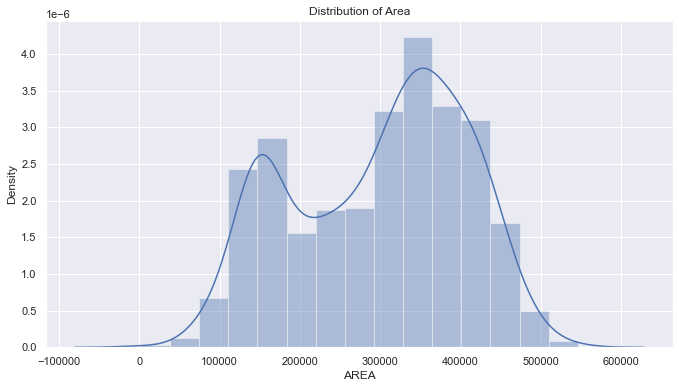

In [66]:
sns.set()
plt.figure(figsize = (10,6))
sns.distplot(df['AREA'])
plt.title("Distribution of Area")
plt.show()

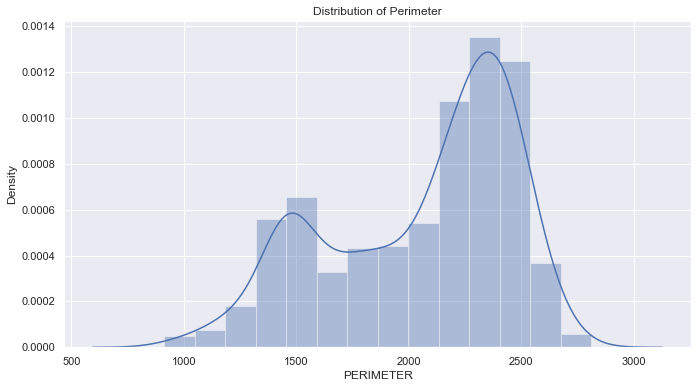

In [67]:
sns.set()
plt.figure(figsize = (10,6))
sns.distplot(df['PERIMETER'])
plt.title("Distribution of Perimeter")
plt.show()

### The distributions of area and perimeter are not normal and are skewed towards higher values.

Text(0.5, 1.0, 'Count of Each Class')

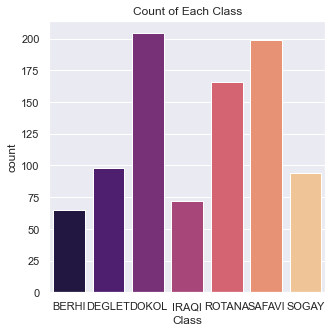

In [126]:
plt.figure(figsize=(15,5)) # set the size of the graph


plt.subplot(131)
sns.countplot(x='Class', data = df, palette="magma")
plt.title("Count of Each Class") # Descriptive Title


#### The distribution of the area and perimeter along with the counts of each class of date confirm to me that the classes are not evenly reprsented. This might not be an issue but it is worth noting.

<AxesSubplot:>

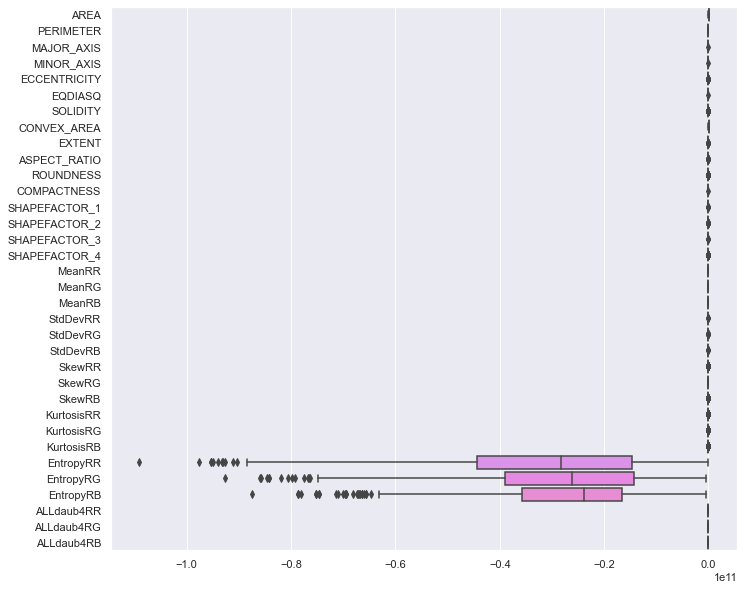

In [68]:
sns.set()
plt.figure(figsize = (10,10))
sns.boxplot(data=df, orient="h")

#### I should probably normalize the data. Those three featueres indicate to me that I should do a min max scaling.

In [69]:
X = df.drop('Class', axis =1)
Y= df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [70]:
sc = MinMaxScaler()

sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [71]:
X_train_sc.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,0.665993,0.775554,0.578900,0.714703,0.639499,0.805070,0.937811,0.666336,0.719104,0.000905,...,0.342748,0.034056,0.043511,0.099349,0.582052,0.665996,0.639749,0.608794,0.410071,0.489445
1,0.627471,0.762374,0.657325,0.624139,0.776099,0.779697,0.802861,0.642027,0.524280,0.001595,...,0.445844,0.471955,0.369448,0.107128,0.944838,0.895558,0.844780,0.082681,0.115615,0.213171
2,0.143467,0.077476,0.046749,0.351202,0.539530,0.343246,0.943408,0.143062,0.697296,0.000621,...,0.210899,0.021114,0.033559,0.014740,0.911239,0.907453,0.908768,0.606462,0.520216,0.545844
3,0.720528,0.719899,0.489983,0.852907,0.281441,0.839773,0.981965,0.715798,0.729573,0.000212,...,0.653783,0.166432,0.299844,0.198095,0.832515,0.753624,0.733966,0.298998,0.295151,0.314375
4,0.442745,0.490529,0.351327,0.624990,0.499389,0.645531,0.957711,0.441406,0.783658,0.000533,...,0.160067,0.030462,0.026595,0.024299,0.573351,0.563458,0.635059,0.794139,0.674104,0.669158


In [72]:
X_test_sc.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,0.260938,0.284414,0.210400,0.458075,0.601954,0.482212,0.919154,0.261618,0.762722,0.000785,...,0.163197,0.099727,0.072434,0.021199,0.662032,0.634053,0.732117,0.961566,0.874701,0.784531
1,0.475257,0.559711,0.480567,0.569988,0.723291,0.670922,0.935945,0.475560,0.443443,0.001265,...,0.336585,0.248114,0.583260,0.062115,0.979242,0.954066,0.910834,0.016079,0.029762,0.129987
2,0.279847,0.311430,0.236697,0.470469,0.617521,0.501400,0.943408,0.279487,0.667927,0.000833,...,0.338429,0.029105,0.053914,0.040591,0.864190,0.853920,0.843504,0.510751,0.421032,0.467063
3,0.580446,0.720536,0.608199,0.684474,0.694750,0.747649,0.404229,0.636342,0.395755,0.001125,...,0.339933,0.022892,0.021672,0.039380,0.566314,0.577547,0.624400,0.674195,0.536022,0.553495
4,0.735728,0.728375,0.521686,0.838808,0.378968,0.849210,0.976368,0.731601,0.797906,0.000331,...,0.722279,0.158636,0.434667,0.268431,0.719307,0.656550,0.601431,0.442147,0.401206,0.465054


In [85]:
lm = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class= 'ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
                   
lm.fit(X_train_sc, y_train)
lm.score(X_test_sc, y_test)

0.8944444444444445

In [91]:
lm.score(X_train_sc, y_train)

0.8495821727019499

#### Accuracy score of 89% is pretty good but leaves room for improvement.

In [95]:
train_pred = lm.predict(X_train_sc)


acc_score = accuracy_score(y_train, train_pred)
prec_score = precision_score(y_train, train_pred, average = 'weighted')
rec_score = recall_score(y_train, train_pred, average = 'weighted')

print('The accuracy score is:', acc_score)
print('The precision score is:', prec_score)
print('The recall score is:', rec_score)

The accuracy score is: 0.8495821727019499
The precision score is: 0.8523064703753297
The recall score is: 0.8495821727019499


In [94]:
test_pred = lm.predict(X_test_sc)


acc_score = accuracy_score(y_test, test_pred)
prec_score = precision_score(y_test, test_pred, average = 'weighted')
rec_score = recall_score(y_test, test_pred, average = 'weighted')

print('The accuracy score is:', acc_score)
print('The precision score is:', prec_score)
print('The recall score is:', rec_score)


The accuracy score is: 0.8944444444444445
The precision score is: 0.8988958976315298
The recall score is: 0.8944444444444445


In [ ]:
# This code finds the appropriate values for C, penalty, class_weight, and solver.

param_grid_lr = [
        {
         'C' : np.arange(.1,.5,.1),
         "penalty":['none', "l1","l2", "elasticnet"],
         "class_weight": [None, 'balanced'],
         'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag'],
         'multi_class' : ['auto', 'ovr', 'multinomial']
        }
]

logreg=LogisticRegression(dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,n_jobs=-1,
                   random_state=42, verbose=0,
                   warm_start=False)

logreg_cv=GridSearchCV(logreg,param_grid_lr,cv = 3)
logreg_cv.fit(X_train_sc,y_train)

print("Tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

#### Tuned hyperparameters :(best parameters)  {'C': 0.1, 'class_weight': None, 'multi_class': 'ovr', 'penalty': 'none', 'solver': 'sag'} Accuracy : 0.9233960948396094

In [117]:
train_pred = logreg_cv.predict(X_train_sc)


acc_score = accuracy_score(y_train, train_pred)
prec_score = precision_score(y_train, train_pred, average = 'weighted')
rec_score = recall_score(y_train, train_pred, average = 'weighted')

print('The accuracy score is:', acc_score)
print('The precision score is:', prec_score)
print('The recall score is:', rec_score)

The accuracy score is: 0.9456824512534819
The precision score is: 0.9452976890861573
The recall score is: 0.9456824512534819


In [118]:
test_pred = logreg_cv.predict(X_test_sc)


acc_score = accuracy_score(y_test, test_pred)
prec_score = precision_score(y_test, test_pred, average = 'weighted')
rec_score = recall_score(y_test, test_pred, average = 'weighted')

print('The accuracy score is:', acc_score)
print('The precision score is:', prec_score)
print('The recall score is:', rec_score)

The accuracy score is: 0.9555555555555556
The precision score is: 0.9571013590621433
The recall score is: 0.9555555555555556


#### Using gridsearchcv, the accuracy improved from 89% to 96% and the recall score improved as well to 96% which tells me the model efficiently finds true positives.

## I would like to see how other classifiers perform compared to LogisticRegresson. 

In [122]:
# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X_train_sc, y_train)
    test_pred = c.predict(X_test_sc)
    acc_score = accuracy_score(y_test, test_pred)
    prec_score = precision_score(y_test, test_pred, average = 'weighted')
    rec_score = recall_score(y_test, test_pred, average = 'weighted')

    print('Scores for ', str(c))
    print('The accuracy score is:', acc_score)
    print('The precision score is:', prec_score)
    print('The recall score is:', rec_score)



Scores for  LogisticRegression()
The accuracy score is: 0.9222222222222223
The precision score is: 0.9225635989524879
The recall score is: 0.9222222222222223
Scores for  LinearSVC()
The accuracy score is: 0.9277777777777778
The precision score is: 0.9296050123880313
The recall score is: 0.9277777777777778
Scores for  SVC()
The accuracy score is: 0.9444444444444444
The precision score is: 0.9472411186696901
The recall score is: 0.9444444444444444
Scores for  KNeighborsClassifier()
The accuracy score is: 0.9
The precision score is: 0.9197280444744947
The recall score is: 0.9


#### Looks like SVC has the highest accuracy score.

In [127]:
# Create pipeline and gridserach for the classifiers
# Find most imporant predictive features